# Data Annotation

Observations: 150  
Features: 4

Feature Names:

- Sepal length
- Sepal width
- Petal length
- Petal width

Iris_labels contains the Iris types observed. 
  
3 classes [Setosa, Versicolour, Virginica] - represented as integers [0,1,2].

In [4]:
# import libraries needed
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
# load in data and labels
X = np.load("Iris_data.npy")
y = np.load("Iris_labels.npy")

# 2.1 Plotting the Ground Truth

Below is a scatter plot that has been mapped to the labels

In [16]:
# function to set axis labels for x and y axis. For use in all plots.
def create_label(feature):
    ax_labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
    ax_label = ax_labels[feature]
    return ax_label

In [4]:
# funtion to plot two of the four features and map to labels in Iris_labels.npy
def plot_gt(x_feature, y_feature):   
    plt.figure(figsize=(8,5))
    labels = ["Setosa", "Versicolour", "Virginica"]
    scatter = plt.scatter(X[:, x_feature], X[:, y_feature], c = y)
    plt.title("Iris Clusters - Ground Truth")
    # add species legend to the plot 
    plt.legend(handles=scatter.legend_elements()[0], 
               labels=labels)
    plt.xlabel(create_label(x_feature))
    plt.ylabel(create_label(y_feature))

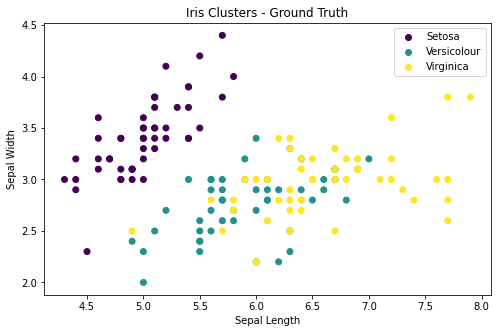

In [5]:
plot_gt(0, 1)

# 2.2 KMeans Clustering

The following code attempts to fit the Iris data to a Kmeans model.

In [10]:
# import kmeans function from sklearn cluster
from sklearn.cluster import KMeans

#  set the value of k to 3, this is based on our knowledge of the labels which we usually wouldn't have when using kmeans.
k = 3

# call the kmeans function to initialise our model
kmeans = KMeans(n_clusters = k, init = "k-means++", n_init = 60)


In [11]:
# fit the data to the model
kmeans.fit(X)

KMeans(n_clusters=3, n_init=60)

In [12]:
# predict clusters
k_pred = kmeans.predict(X)

In [13]:
# view predictions
k_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [14]:
# function to plot chosen features, map colour to predictions, and locate centroids
def plot_kmeans(x_feature, y_feature):
    plt.figure(figsize=(8,5))
    labels = ["Setosa", "Versicolour", "Virginica"]
    scatter = plt.scatter(X[:,x_feature], X[:,y_feature], c = k_pred)
    centroids = kmeans.cluster_centers_
    
    plt.scatter(centroids[:,x_feature], centroids[:, y_feature], 
                s = 72, c = "red", marker = "X") 
    
    plt.title("Iris Clusters")
    plt.legend(handles=scatter.legend_elements()[0], 
               labels=labels)
    plt.xlabel(create_label(x_feature))
    plt.ylabel(create_label(y_feature))
    

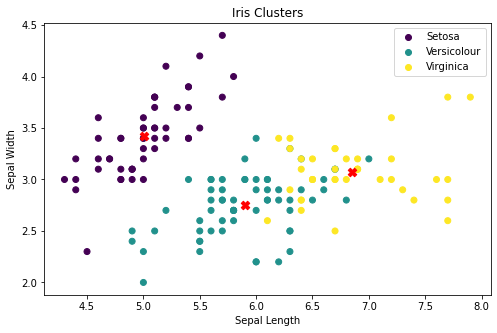

In [17]:
plot_kmeans(0,1)

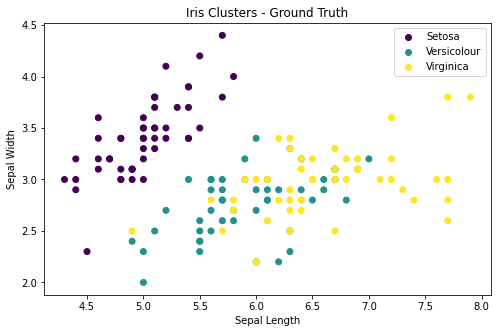

In [12]:
plot_gt(0, 1)

# 2.3 Gaussian Mixture Models (GMMs)

The below code attempts to apply Gaussian Mixture Models to the Iris data set

In [13]:
# import GMM from sklearn
from sklearn.mixture import GaussianMixture

# set number of gaussian clusters
n_clusters = 3

# instantiate a GMM model
gmm = GaussianMixture(n_components = n_clusters, max_iter = 300, init_params = "kmeans")

In [14]:
# fit data to GMM model
gmm.fit(X)

GaussianMixture(max_iter=300, n_components=3)

In [15]:
# make GMM predictions
gmm_pred = gmm.predict(X)
gmm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# function to plot features, map to GMM predictions and locate gaussian means
def plot_gmm(x_feature, y_feature):  
    plt.figure(figsize=(8,5))
    labels = ["Setosa", "Versicolour", "Virginica"]
    scatter = plt.scatter(X[:,x_feature], X[:,y_feature], c = gmm_pred)
    g_means = gmm.means_
    
    plt.scatter(g_means[:, x_feature], g_means[:, y_feature], 
                s = 72, c = "red", marker = "X")
      
    
    plt.title("Iris Clusters")
    plt.legend(handles=scatter.legend_elements()[0],labels=labels)
    plt.xlabel(create_label(x_feature))
    plt.ylabel(create_label(y_feature))
    

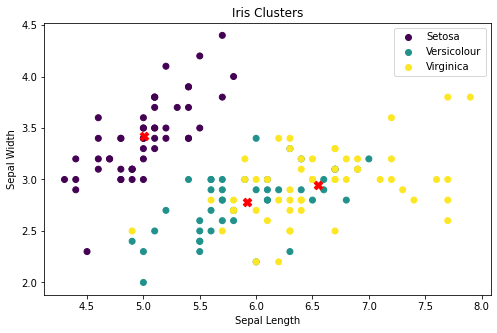

In [17]:
plot_gmm(0,1)

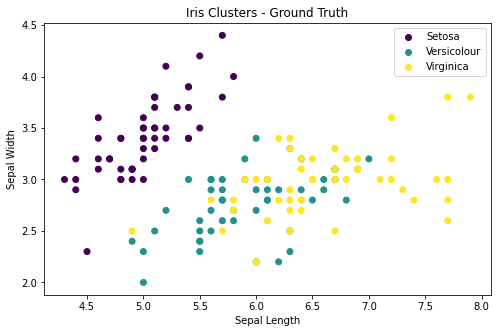

In [18]:
plot_gt(0,1)

In [19]:
# generate posterior probability for each of the gaussian components and view shape
post_prob = gmm.predict_proba(X)
post_prob.shape

(150, 3)

In [20]:
# function to visualise each of the gaussian components and display as subplots
def plot_post_prob(x_feature, y_feature):

    fig, (ax1, ax2, ax3) = plt.subplots(figsize = (20, 4), ncols=3)

    component_1 = ax1.scatter(X[:, x_feature], X[:, y_feature], c = post_prob[:, 0])
    fig.colorbar(component_1, ax = ax1)
    ax1.set_title('Component One')

    component_2 = ax2.scatter(X[:, x_feature], X[:, y_feature], c = post_prob[:, 1])
    fig.colorbar(component_2, ax = ax2)
    ax2.set_title('Component Two')

    component_3 = ax3.scatter(X[:, x_feature], X[:, y_feature], c = post_prob[:, 2])
    fig.colorbar(component_3, ax = ax3)
    ax3.set_title('Component Three')

    for ax in (ax1, ax2, ax3):
        ax.set(xlabel = create_label(x_feature), ylabel = create_label(y_feature))
        
    

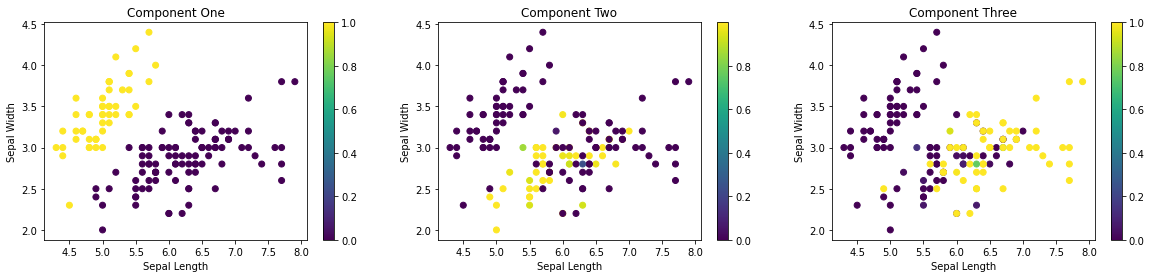

In [21]:
plot_post_prob(0,1)

# 2.4 Apply Your Skill

Below we will take an unknown data set and try to ascertain the optimal value of k for a kmeans model.

In [22]:
X_data = np.load("task2_4.npy")

In [23]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import silhouette_samples, silhouette_score

## Create a scatterplot matrix 

This is to initially see if any clusters can be visually identified

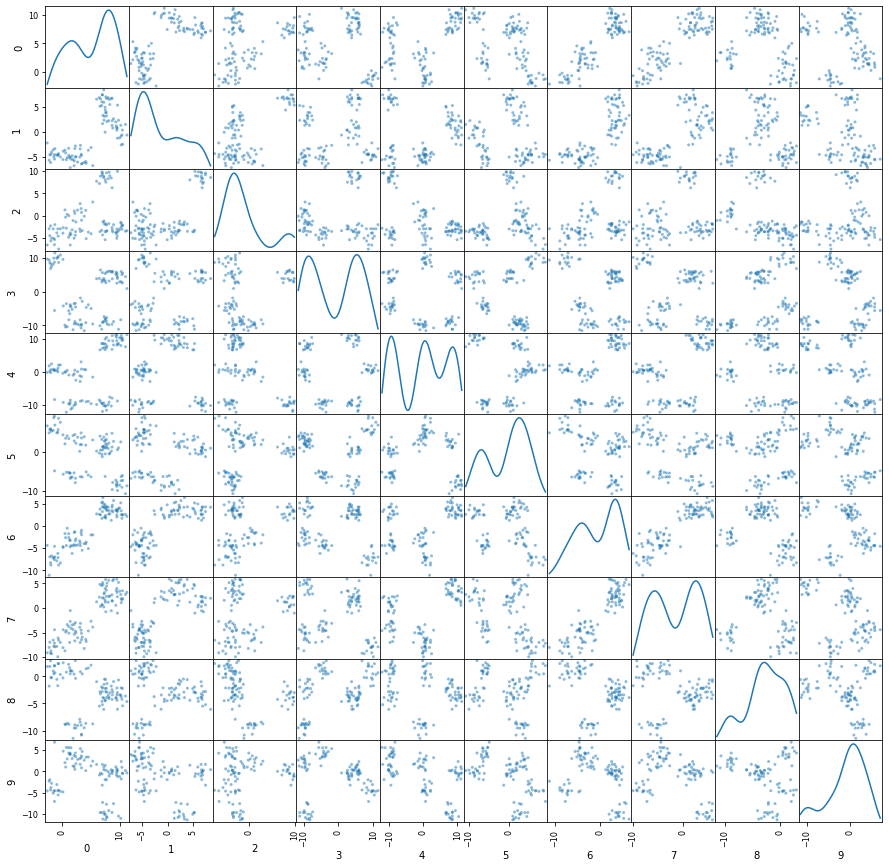

In [24]:
df = pd.DataFrame(X_data)
plot_df = scatter_matrix(df, figsize = (15, 15), diagonal = 'kde')

Provisionally, it looks like features 3 and 4 show 6 evenly distinct clusters when plotted in 2 dimensional space.

However, let's use more robust methods to see if there are other, more suitable, cluster numbers

## Silhouette Score and Sum of Squared Error

Below we will use a loop to generate a silhouette score and sum of squared error. We will store these in a dataframe for future use

In [25]:
cluster_range = [3, 4, 5, 6, 7, 8, 9, 10]

clusters = []
sil_score = []
sum_squared = []

for n_clusters in cluster_range:
    cluster_att = KMeans(n_clusters = n_clusters, init = "k-means++", 
                         n_init = 10, random_state = 42).fit(X_data)
    k_pred = cluster_att.predict(X_data)
    silhouette_avg = silhouette_score(X_data, k_pred)
    inertia = cluster_att.inertia_
    
    clusters.append(n_clusters)
    sil_score.append(silhouette_avg)
    sum_squared.append(inertia)

    
result = pd.DataFrame(
    {'Number of Clusters': clusters,
     'Silhouette Score': sil_score,
     'Sum of Squared Error': sum_squared
    })

result.style.hide_index()

Number of Clusters,Silhouette Score,Sum of Squared Error
3,0.468265,12762.775228
4,0.584968,7559.487354
5,0.665247,4223.173515
6,0.749483,1351.589802
7,0.653083,1301.503401
8,0.539071,1265.631385
9,0.440799,1210.104995
10,0.327096,1176.900691


Below we plot the details from the dataframe, you will see on the left hand side a line plot showing the silhouette score and on the right an elbow plot showing the SSE.  
  
The combination of these plots show that the optimal number of clusters in this case is, indeed, 6. This is because this is both the point where the silhouette score is highest (shown on the left) and the point at which convergence has been reached (shown on the right).

Text(0.5, 1.0, 'SSE by Cluster Number')

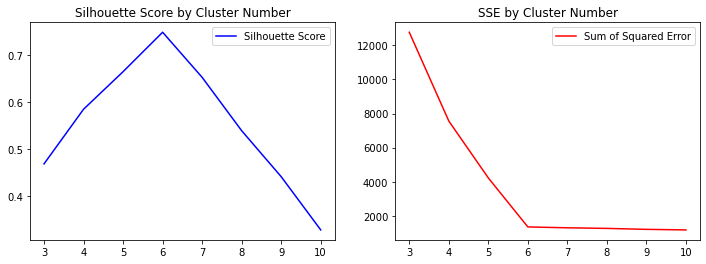

In [26]:
fig, (ax1, ax2) = plt.subplots(figsize = (12, 4), ncols=2)

component_1 = ax1.plot(clusters, sil_score, c = "b", label = "Silhouette Score")
ax1.legend()
ax1.set_title('Silhouette Score by Cluster Number')

component_2 = ax2.plot(clusters, sum_squared, c = "r", label = "Sum of Squared Error")
ax2.legend()
ax2.set_title('SSE by Cluster Number')


In [27]:
def show_cluster_scatter(n_clusters = 6, x_feature = 3, y_feature = 4 , data = X_data,):
    kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", 
                         n_init = 10, random_state = 42).fit(data)
    k_pred = kmeans.predict(data)
    
    plt.scatter(data[:, x_feature], data[:, y_feature], c = k_pred)
    centroids = kmeans.cluster_centers_
    
    plt.scatter(centroids[:,3], centroids[:, 4], s = 72, c = "red", marker = "X") 
    plt.title("Clusters")
    plt.show()

To see the effect of different cluster numbers in terms of cluster output, you may enter different cluster numbers to the function call below to visualise them.  
  
The default features being plotted here are features 3 and 4 of the data set. However, you are welcome to change these by filling in the "None" values in the commented out code in the below cell

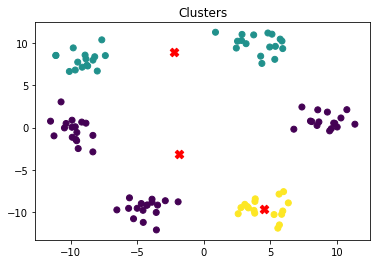

In [28]:
show_cluster_scatter(n_clusters = 3)

# show_cluster_scatter(n_clusters = None, x_feature = None, y_feature = None)

By calling this function using the default parameters below you will see that we can show 6 very distinct clusters.

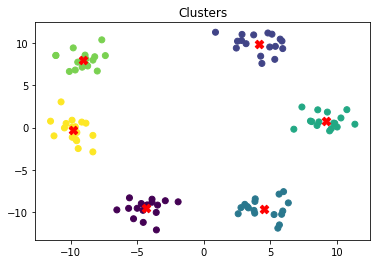

In [29]:
show_cluster_scatter()